Stroke - a sudden change in the blood supply to a part of the brain, sometimes causing a loss of the ability to move particular parts of the body.


we  will try to analyze all the factors influencing stroke,to extract their influence with Exploratory data analysis and also build a model to predict the possible occurrence of disease in a patient.

Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Import libraries

For data manipulation and analysis 

In [1]:
import os
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

pd.options.mode.chained_assignment = None

For beautiful visualization

In [2]:
from tkinter import *
from tkinter import ttk


In [3]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

For work with ML and ANN

In [4]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
# read in the data and check the first 5 rows
df = pd.read_csv(r'C:\Users\Dell\Downloads\stroke\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Missing Values

In [10]:
mis_val_colors = []

for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('red')

Text(0.5, 1.15, 'Missing values (before)')

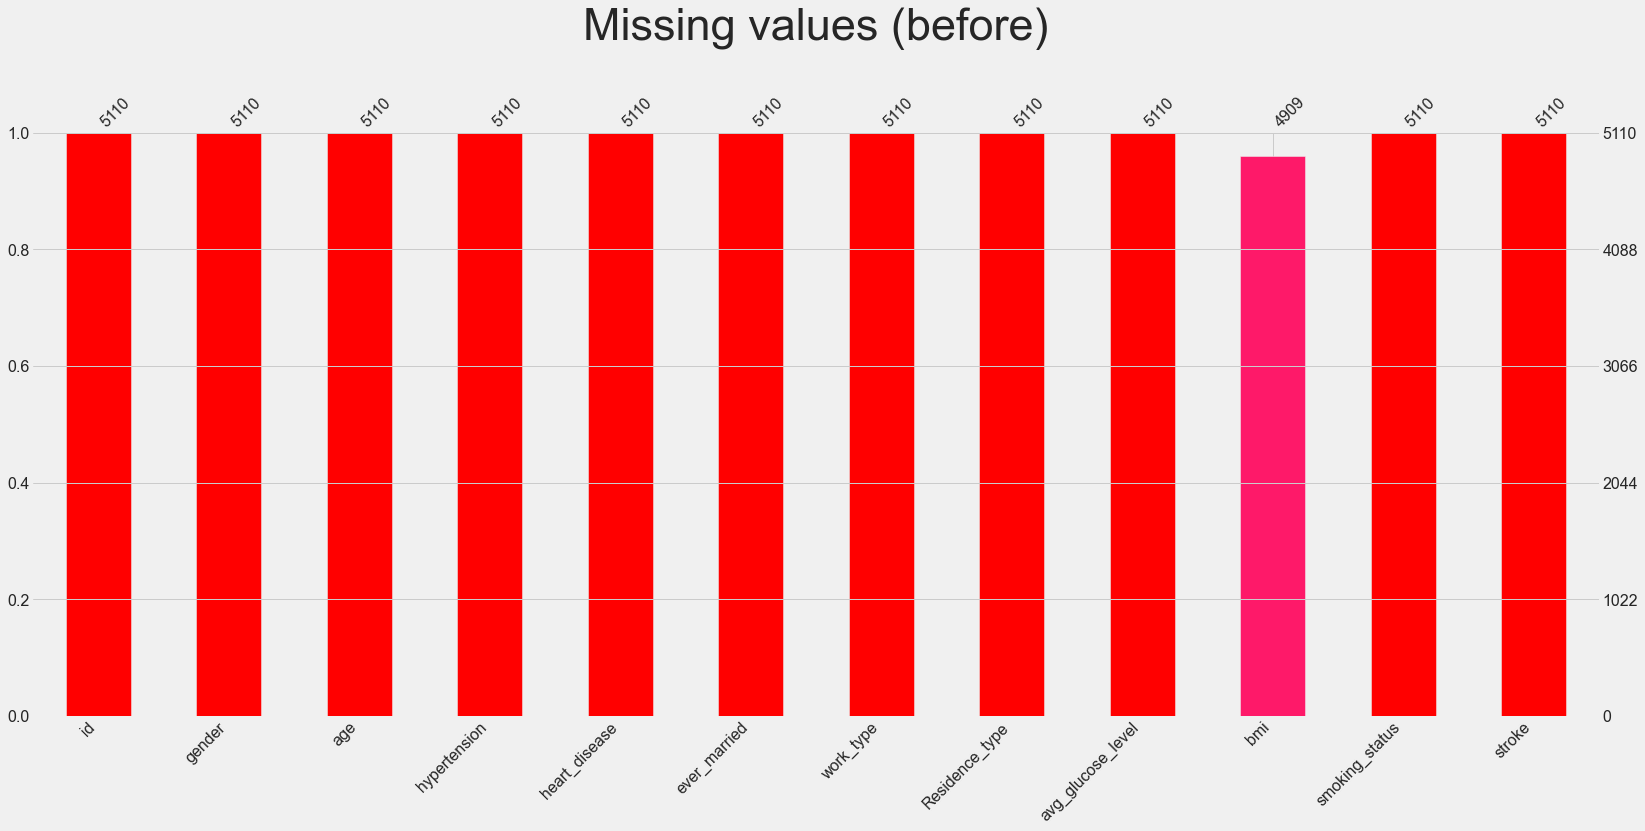

In [11]:
msn.bar(df, color=mis_val_colors)
plt.title('Missing values (before)', size=45, y=1.15)

This dataset has some missing values in BMI(Body mass index) column

In [12]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [13]:
mis_val_colors_after = []

for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_val_colors_after.append('#fe1969')
    else:
        mis_val_colors_after.append('limegreen')

Text(0.5, 1.15, 'Missing values (after)')

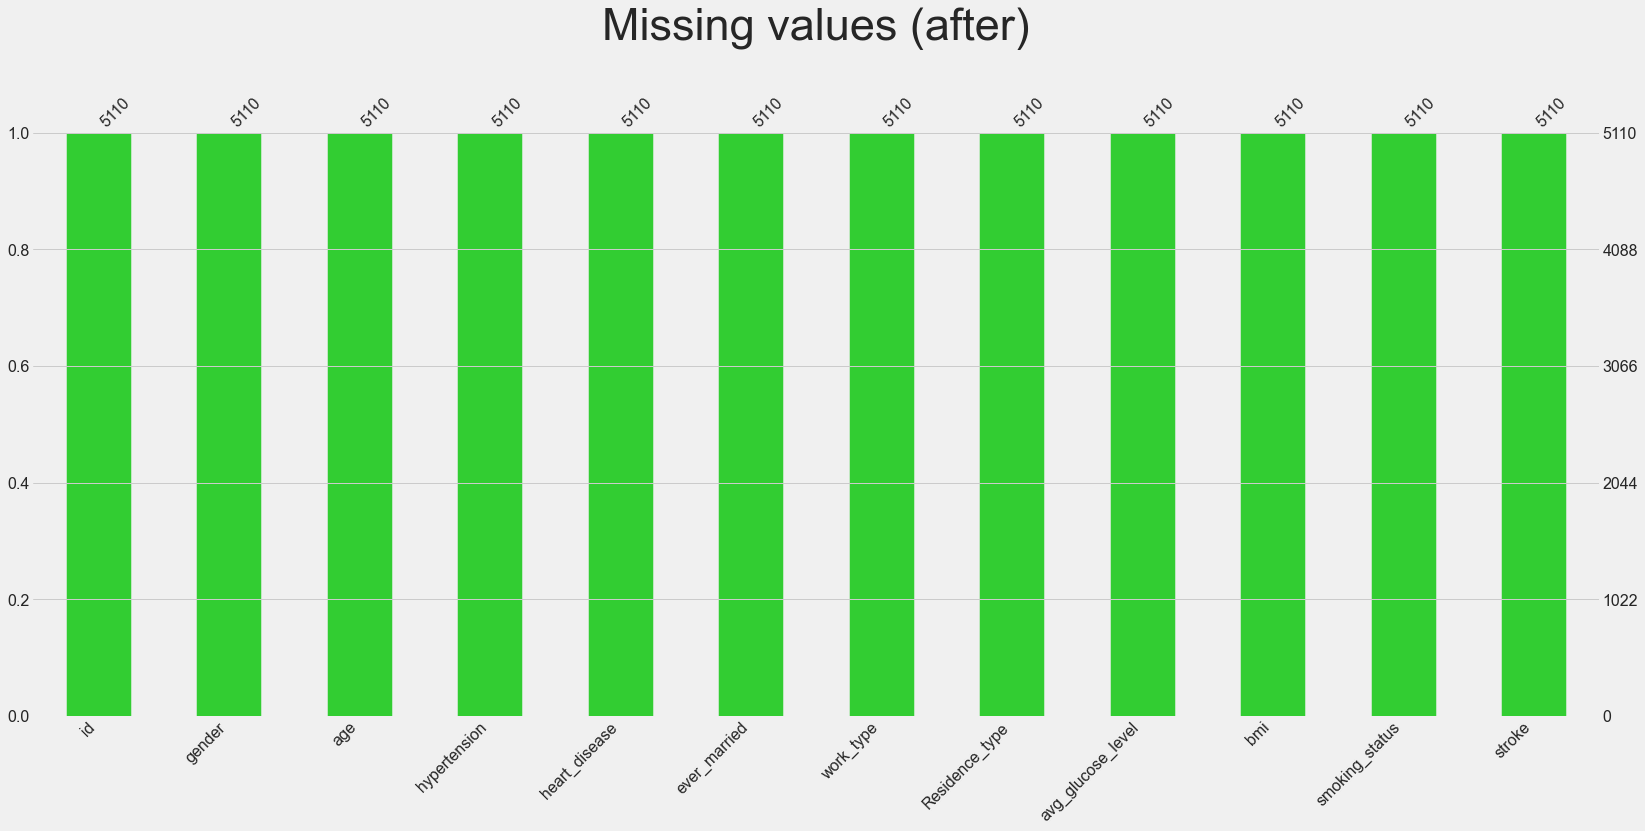

In [14]:
msn.bar(df, color=mis_val_colors_after)
plt.title('Missing values (after)', size=45, y=1.15)

In [15]:
sns.set(palette = ['#fe346e', '#2c003e'], font = 'Serif', style = 'white', rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

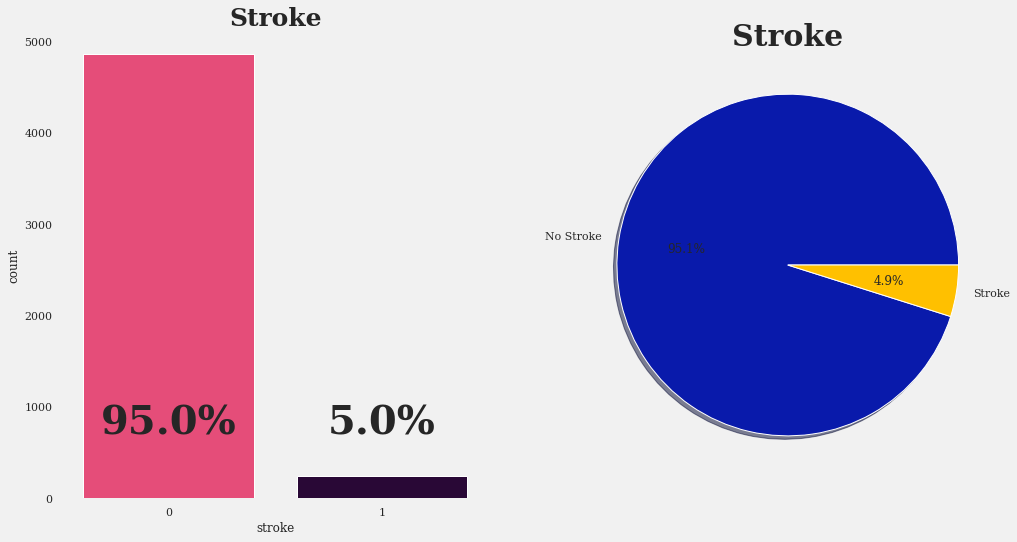

In [16]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'stroke', data = df)

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = 700, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 40, weight = 'bold')
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Stroke", size = 25, weight = 'bold')

plt.subplot(1, 2, 2)
labels = ['No Stroke', 'Stroke']
pie_colors = ['#091AAB', '#ffc000']

plt.pie(df['stroke'].value_counts().values ,labels = labels, colors = pie_colors, autopct='%1.1f%%', shadow = True)
plt.title('Stroke', size = 30, weight = 'bold')

plt.show()

EDA

ID

This column has no regularity with predicted variable

In [17]:
df.drop(['id'], axis=1, inplace=True)

In [18]:
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

Gender

In [19]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
df = df[df.gender != 'Other']

Text(0, 0.5, 'Gender Influence on Stroke')

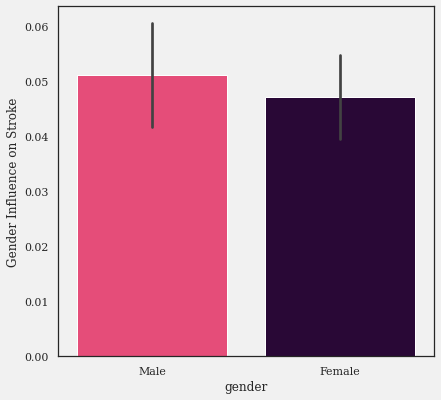

In [21]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'gender', y = 'stroke', data = df)
ax.set_ylabel('Gender Influence on Stroke')

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

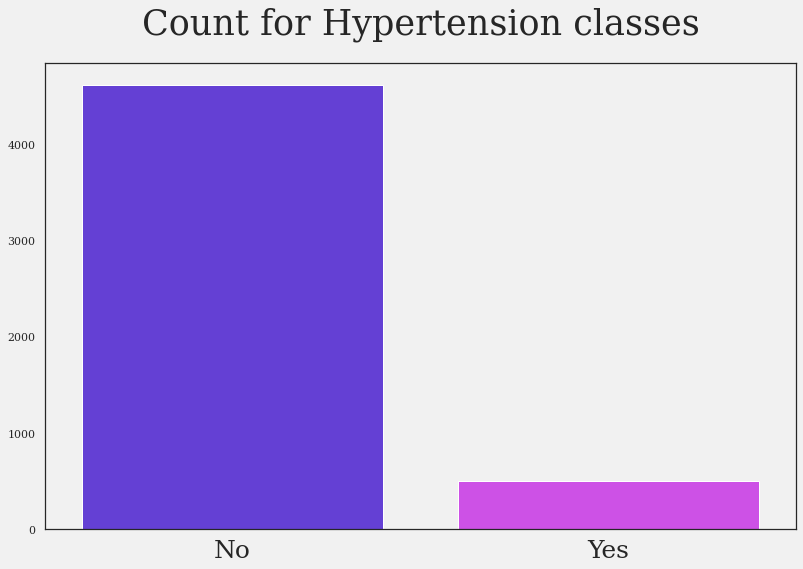

In [22]:
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=df.hypertension,
                            palette=two_colors[::-1])
hypertension_plot.set_title('Count for Hypertension classes',
                      fontsize=35, y=1.05)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=25,)

Text(0, 0.5, 'Storke Probability')

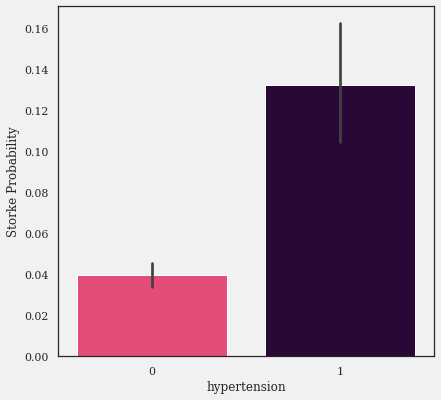

In [23]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'hypertension', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')

Text(0, 0.5, 'Storke Probability')

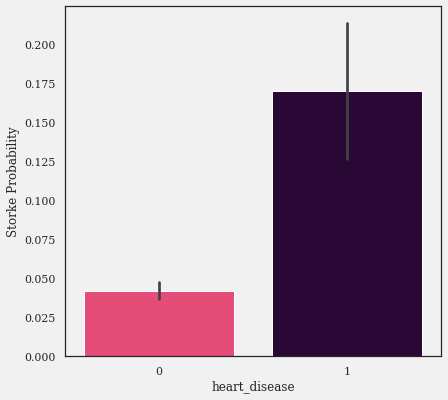

In [24]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'heart_disease', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')

Married

Text(0.5, 1.0, 'Married (y/n)')

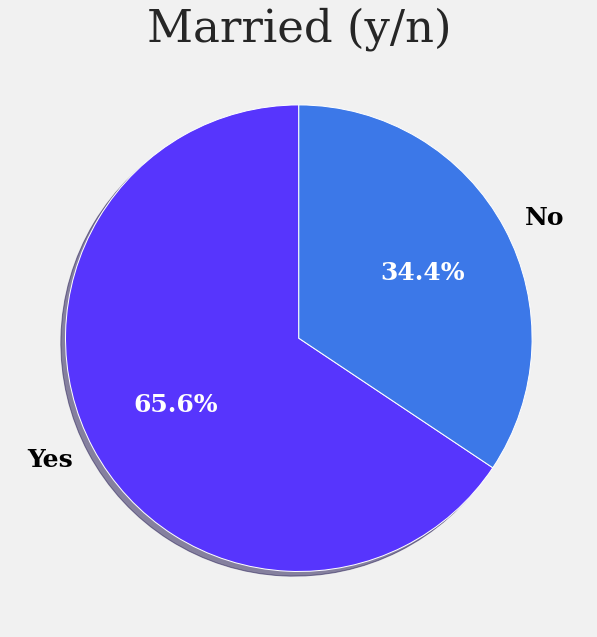

In [25]:
married_df = df.ever_married.value_counts()

explode = (0.07, 0.02)
pie_colors = ('#5735FD', '#3C78E8')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(married_df,
                               labels=married_df.index,
                               colors=pie_colors,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 25,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Married (y/n)', size=45)

Text(0, 0.5, 'Storke Probability')

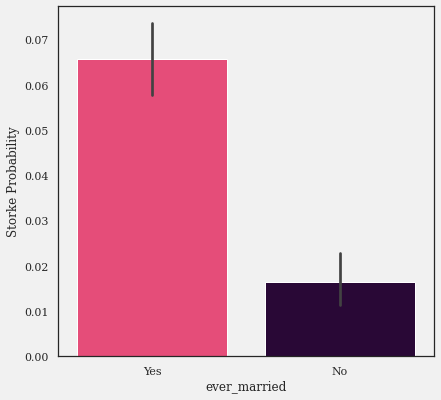

In [26]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'ever_married', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')

Residence type

Text(0, 0.5, 'Storke Probability')

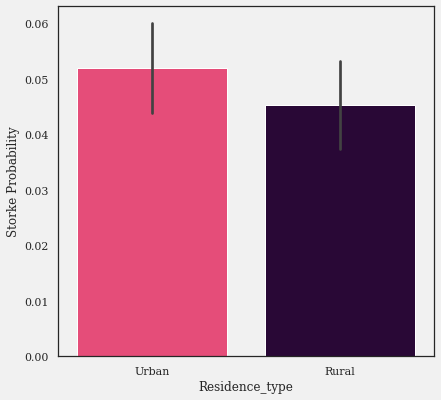

In [27]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'Residence_type', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')

Work type:

children

government job

never worked

private

self-employed

[Text(0, 0, 'Private'),
 Text(1, 0, 'Self-employed'),
 Text(2, 0, 'Govt_job'),
 Text(3, 0, 'children'),
 Text(4, 0, 'Never_worked')]

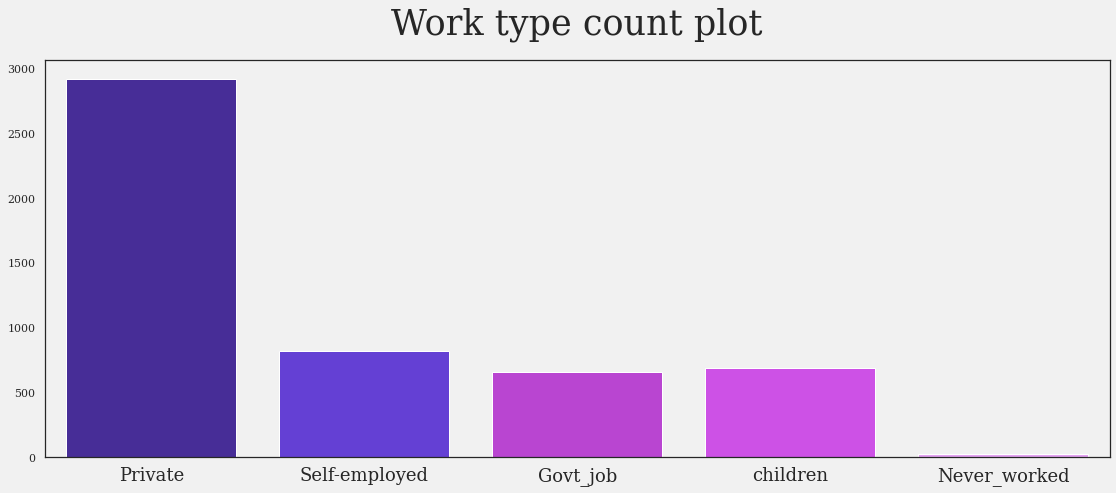

In [28]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
work_type_plot = sns.countplot(x=df.work_type, ax=ax1, palette=five_colors)
work_type_plot.set_title('Work type count plot'
                        ,
                         fontsize=35, y=1.05)
work_type_plot.set(xlabel=None,
                   ylabel=None)
work_type_plot.set_xticklabels(work_type_plot.get_xticklabels(),
                                size=18)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children'),
  Text(4, 0, 'Never_worked')])

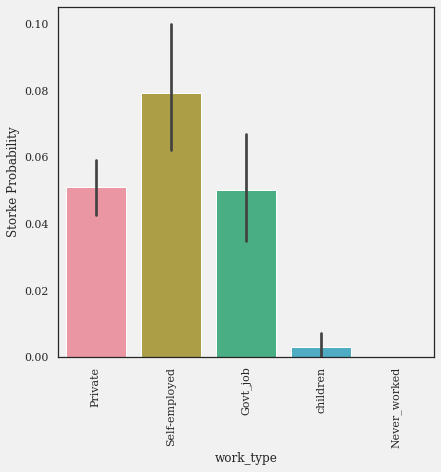

In [29]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'work_type', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')
plt.xticks(rotation = 90)

Smoking 

[Text(0, 0, 'formerly smoked'),
 Text(1, 0, 'never smoked'),
 Text(2, 0, 'smokes'),
 Text(3, 0, 'Unknown')]

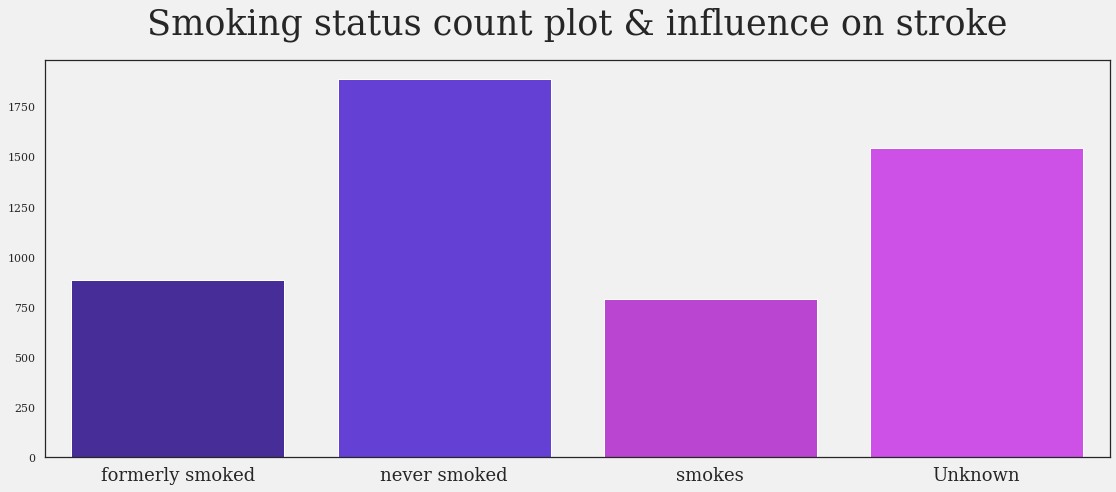

In [30]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
smoke_plot = sns.countplot(x=df.smoking_status, ax=ax1, palette=five_colors)
smoke_plot.set_title('Smoking status count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05)
smoke_plot.set(xlabel=None,
                   ylabel=None)
smoke_plot.set_xticklabels(smoke_plot.get_xticklabels(),
                                size=18)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'formerly smoked'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'Unknown')])

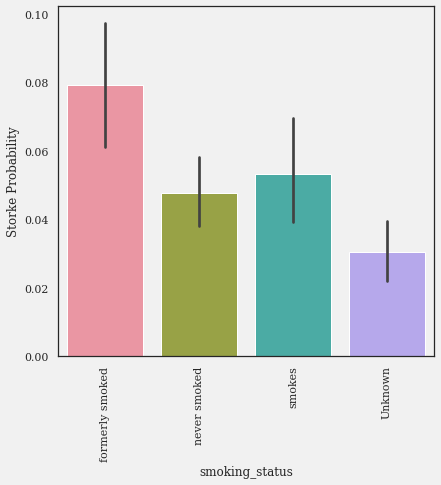

In [31]:
plt.figure(figsize = (6, 6))
ax = sns.barplot(x = 'smoking_status', y = 'stroke', data = df)
ax.set_ylabel('Storke Probability')
plt.xticks(rotation = 90)

Age

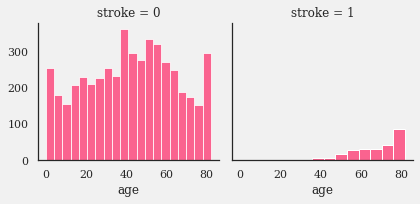

In [32]:
g = sns.FacetGrid(df, col = 'stroke')
g = g.map(sns.histplot, 'age')

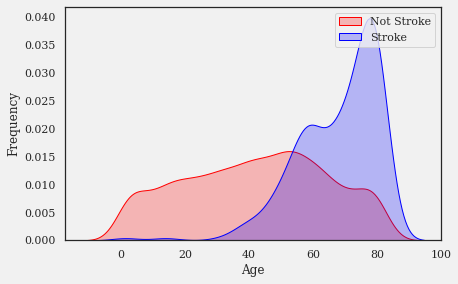

In [33]:
g = sns.kdeplot(df['age'][(df['stroke'] == 0) & (df['age'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(df['age'][(df['stroke'] == 1) & (df['age'].notnull())], ax = g, color = 'Blue', shade = True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Stroke', 'Stroke'])

Glucose level

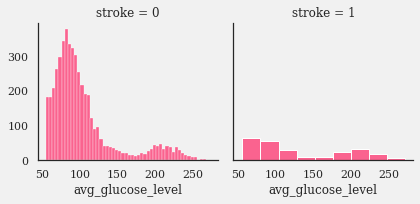

In [34]:
g = sns.FacetGrid(df, col = 'stroke')
g = g.map(sns.histplot, 'avg_glucose_level')

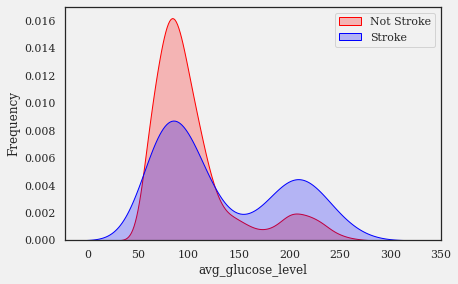

In [35]:
g = sns.kdeplot(df['avg_glucose_level'][(df['stroke'] == 0) & (df['avg_glucose_level'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(df['avg_glucose_level'][(df['stroke'] == 1) & (df['avg_glucose_level'].notnull())], ax = g, color = 'Blue', shade = True)
g.set_xlabel('avg_glucose_level')
g.set_ylabel('Frequency')
g = g.legend(['Not Stroke', 'Stroke'])

BMI

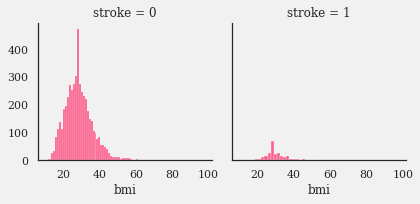

In [36]:
g = sns.FacetGrid(df, col = 'stroke')
g = g.map(sns.histplot, 'bmi')

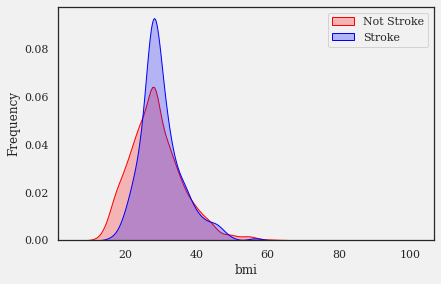

In [37]:
g = sns.kdeplot(df['bmi'][(df['stroke'] == 0) & (df['bmi'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(df['bmi'][(df['stroke'] == 1) & (df['bmi'].notnull())], ax = g, color = 'Blue', shade = True)
g.set_xlabel('bmi')
g.set_ylabel('Frequency')
g = g.legend(['Not Stroke', 'Stroke'])

Coding categorical data

In [38]:
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

Heatmap

<AxesSubplot:>

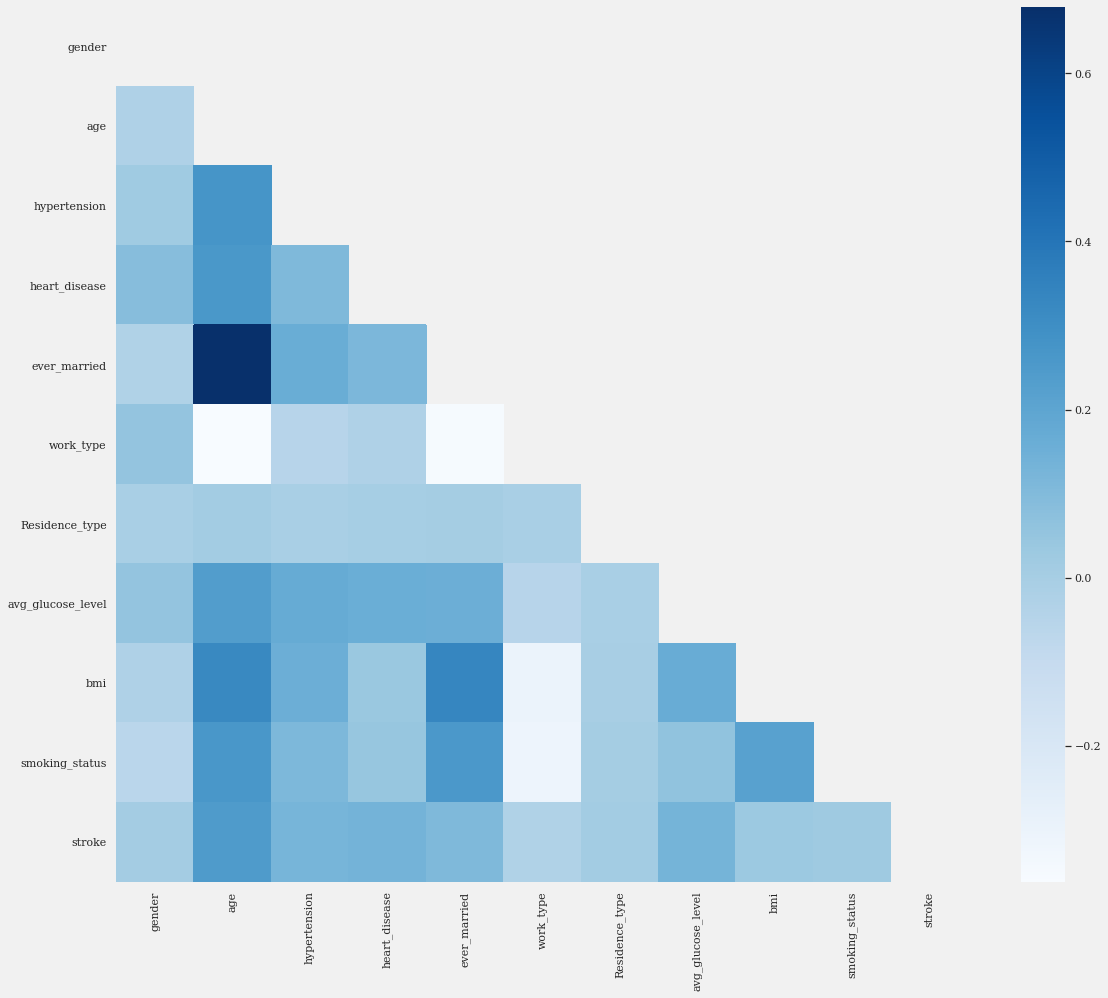

In [39]:
plt.figure(figsize=(17, 15))

corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues')
h_map

In [40]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1


In [41]:
X = df.drop(['stroke'], axis=1)
y = df.stroke

In [42]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [43]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE(random_state=0)

X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = \
        train_test_split(X, y,random_state=random_state)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [47]:
CV =[]
train_accuracy = []
test_accuracy = []
precisionscore=[]
Recallscore=[]
f1score=[]
auc=[]

def  stroke_Prediction(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # accuracy score of train set
    y_pred_train = model.predict(X_train)
    train_accuracy_model = accuracy_score(y_train,y_pred_train)
    train_accuracy.append(round(train_accuracy_model,2))
    
    # accuracy score of test set
    y_pred_test = model.predict(X_test)
    test_accuracy_model = accuracy_score(y_test,y_pred_test)
    test_accuracy.append(round(test_accuracy_model,2))
    
    # accuracy score of train set using Cross validation
    cross_val = cross_val_score(model ,X_train,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    #confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_test,labels=[1,0])
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
    # Precison
    Precision = true_positive/(true_positive+false_positive)
    precisionscore.append(round(Precision,2))
    # Recall
    Recall = true_positive/(true_positive+false_negative)
    Recallscore.append(round(Recall,2)) 
    # f1
    f1=2*((Precision * Recall )) /(Precision + Recall)
    f1score.append(round(f1,2)) 
    # Area Under Curve
    auc_value = roc_auc_score(y_test,y_pred_test)
    auc.append(round(auc_value,4))
      # Printing results
    print("Train accuracy :",round(train_accuracy_model,2))
    print("Test accuracy :",round(test_accuracy_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("confusion_matrix:",conf_mat)
    print("Accuracy:",Accuracy)
    print("Precision:",Precision)
    print("Recall:",Recall)
    print("F1score:",f1)
    print("Train auc_value :",auc_value)
    
    

In [48]:
from sklearn.linear_model  import  LogisticRegression
log_reg = LogisticRegression()
stroke_Prediction(log_reg,"LogisticRegression.pkl")

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Dell\anaconda3\lib\site-packages\sk

Train accuracy : 0.8
Test accuracy : 0.8
Train CV scores : [0.80521262 0.77983539 0.79423868 0.79766804 0.82167353]
Train CV mean : 0.8
confusion_matrix: [[984 225]
 [256 965]]
Accuracy: 0.8020576131687243
Precision: 0.8138957816377171
Recall: 0.7935483870967742
F1score: 0.8035933033891385
Train auc_value : 0.8021157859867538


In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
rnd_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter =10, cv=9)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]})

In [51]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_


{'n_neighbors': 3, 'leaf_size': 34, 'algorithm': 'brute'}

In [52]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =34, n_neighbors =11)

In [53]:
stroke_Prediction(knn_1,"knn_1.pkl")

Train accuracy : 0.88
Test accuracy : 0.87
Train CV scores : [0.85185185 0.8484225  0.85253772 0.85596708 0.87654321]
Train CV mean : 0.86
confusion_matrix: [[1170   39]
 [ 269  952]]
Accuracy: 0.8732510288065843
Precision: 0.967741935483871
Recall: 0.8130646282140376
F1score: 0.8836858006042297
Train auc_value : 0.8737153575863253


In [54]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
rnd_search = RandomizedSearchCV(RandomForestClassifier(), grid_param, n_iter =10, cv=9)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]})

In [55]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

{'n_estimators': 130,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17,
 'criterion': 'entropy'}

In [56]:
rand_clf_1=RandomForestClassifier(criterion= 'gini',
 max_depth = 8,
 max_features = 'auto',
 min_samples_leaf = 9,
 min_samples_split= 2,
 n_estimators = 130,random_state=6)

In [57]:
stroke_Prediction(rand_clf_1,"rand_clf_1.pkl")

Train accuracy : 0.88
Test accuracy : 0.87
Train CV scores : [0.85871056 0.85116598 0.87654321 0.86282579 0.86556927]
Train CV mean : 0.86
confusion_matrix: [[1103  106]
 [ 221 1000]]
Accuracy: 0.8654320987654321
Precision: 0.91232423490488
Recall: 0.8330815709969789
F1score: 0.8709040663245164
Train auc_value : 0.8656625269528495


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier

In [59]:
xgb_1 = XGBClassifier(objective='binary:logistic')
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}
rnd_search = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, n_iter =5, cv=5)
rnd_search.fit(X_train,y_train)


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the f

[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                     

In [60]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.5}

In [61]:
xgb_2=XGBClassifier(learning_rate= .01, max_depth= 3, n_estimators= 100)

In [62]:
stroke_Prediction(xgb_2,"xgb_2.pkl")

[12:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy : 0.81
Test accuracy : 0.81
Train CV scores : [0.80727023 0.79561043 0.82853224 0.79698217 0.83058985]
Train CV mean : 0.81
confusion_matrix: [[1112   97]
 [ 372  849]]
Accuracy: 0.8069958847736626
Precision: 0.9197684036393714
Recall: 0.7493261455525606
F1score: 0.8258447827701447
Train auc_value : 0.8075500494855333


In [63]:
Technique = ["LogisticRegression","KNN","RandomForest","XGB"]
results=pd.DataFrame({'Model': Technique,'Train accuracy ': train_accuracy,'Test accuracy': test_accuracy,'CV score mean(Train)': CV,'AUC_value':auc,'Precision':precisionscore,'Recall':Recallscore,'f1 score':f1score})
display(results)

,Model,Train accuracy,Test accuracy,CV score mean(Train),AUC_value,Precision,Recall,f1 score
0,LogisticRegression,0.80,0.80,0.80,0.8021,0.81,0.79,0.80
1,KNN,0.88,0.87,0.86,0.8737,0.97,0.81,0.88
2,RandomForest,0.88,0.87,0.86,0.8657,0.91,0.83,0.87
3,XGB,0.81,0.81,0.81,0.8076,0.92,0.75,0.83


In [64]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
9448,0,82.000000,0,1,1,0,0,213.776935,29.202369,0
3111,1,58.000000,0,0,1,0,1,160.870000,28.100000,1
9013,1,64.542001,0,0,1,2,0,228.610115,30.946601,1
8121,0,76.120038,0,0,0,2,1,110.079610,26.979962,0
1701,1,8.000000,0,0,0,4,0,91.540000,13.400000,0
...,...,...,...,...,...,...,...,...,...,...
5734,1,78.000000,0,0,0,3,1,90.395976,26.984072,1
5191,0,66.959685,0,0,0,3,1,70.262305,32.362315,1
5390,0,78.763828,1,0,1,3,1,198.809924,25.953959,1
860,0,46.000000,0,0,1,2,0,100.150000,50.300000,3


In [65]:
finalmodel =RandomForestClassifier(criterion= 'gini',
 max_depth = 8,
 max_features = 'auto',
 min_samples_leaf = 9,
 min_samples_split= 2,
 n_estimators = 130,random_state=6)

In [67]:
finalmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=9, n_estimators=130,
                       random_state=6)

In [70]:
import numpy as np
finalmodel.predict([[0,82.000000,0,1,1,0,0,213.776935,29.202369,0]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1], dtype=int64)

In [76]:
import pickle 
filename = 'stroke_finalized_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [77]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [78]:
loaded_model1.predict([[0,82.000000,0,1,1,0,0,213.776935,29.202369,0]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1], dtype=int64)

In [79]:
type(loaded_model1)

sklearn.ensemble._forest.RandomForestClassifier

In [80]:
loaded_model1

RandomForestClassifier(max_depth=8, min_samples_leaf=9, n_estimators=130,
                       random_state=6)